# COGS 109 Final Project

Note: You can click on headings to hide code in those sections.

# Test Code

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import KFold
from statsmodels.formula.api import ols

# Creating pandas dataframe off dataset (imported from https://www.kaggle.com/mathurinache/world-happiness-report?select=2020.csv)
# Placed into personal github as a raw for easy read.
data = pd.read_csv('https://raw.githubusercontent.com/NolanChai/COGS-109-Datasets/main/2020%20(1).csv')

# Cleaning data, renaming columns.
data = data.rename(columns ={"Ladder score": "Happiness Score", "Perceptions of corruption": "Absence of Corruption"})
data = data.rename(columns ={"Healthy life expectancy": "Life Expectancy", "Freedom to make life choices": "Freedom", "Logged GDP per capita": "Economic Production"})

# Initiate variables
model1_mse = []
k = 5
kf = KFold(n_splits = k, random_state = 0, shuffle = True)

# Training multiple regression model
for train_index, val_index in kf.split(data):
    model = ols(formula = 'Q("Happiness Score") ~ Q("Economic Production") + Q("Social support") + Q("Life Expectancy") + Q("Freedom") + Q("Generosity") + Q("Absence of Corruption")', data=data.iloc[train_index, :]).fit()
    y_hat = model.predict(data.iloc[val_index, :])
    
    y = data['Happiness Score'][val_index].values
    
    # Calculating MSEs, using K-Fold CV to select
    MSE = np.mean((y-y_hat)**2)
    model1_mse.append(MSE)
    print(model.summary())

model1_mse

# Finished Code

In [ ]:
# FORWARD STEPWISE WITH K-FOLD CCV

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from numpy import mean
from numpy import absolute
from numpy import sqrt

# Creating pandas dataframe off dataset (imported from https://www.kaggle.com/mathurinache/world-happiness-report?select=2020.csv)
# Placed into personal github as a raw for easy read.
data = pd.read_csv('https://raw.githubusercontent.com/NolanChai/COGS-109-Datasets/main/2020%20(1).csv')

# Cleaning data, renaming columns.
data = data.rename(columns ={"Ladder score": "Happiness Score", "Perceptions of corruption": "Absence of Corruption"})
data = data.rename(columns ={"Healthy life expectancy": "Life Expectancy", "Freedom to make life choices": "Freedom", "Logged GDP per capita": "Economic Production"})
Xs = ['Economic Production', 'Social support', 'Life Expectancy', 'Freedom', 'Generosity', 'Absence of Corruption', 'Dystopia + residual']
X = data[Xs]
Y = data['Happiness Score']

def mean_squared_error(Y, predictions):
    return np.mean(np.power(Y-predictions, 2))

# Forward Stepwise Regression
"" ""
# K-Fold
def KFoldMSE(X, Y, splits):
  KFC_V = KFold(n_splits=splits, shuffle=True, random_state=1)
  scores = cross_val_score(LinearRegression(), X, Y, scoring='neg_mean_squared_error', cv = KFC_V, n_jobs=-1)
  return sqrt(mean(absolute(scores)))

MSEs = []
current = []
for each in range(0, len(Xs)):
  temp = [Xs[each]]
  X = data[temp]
  Y = data['Happiness Score']
  model = sm.OLS(Y, X).fit()
  predictions = model.predict()
  MSEs.append(KFoldMSE(X, Y, 5))
best = Xs[MSEs.index(min(MSEs))]
current.append(best)
modelf = LinearRegression().fit(X, Y)
print("Estimated Intercept in this model : " +str(modelf.intercept_))
print("Estimated Coefficients in this model :" +str(modelf.coef_))
modelf = LinearRegression()
print("current variables: "+str(current))
print("current mse: "+str(min(MSEs)))
print("———————————————————————————————————\n\n")

for i in range(0, len(Xs)-1):
  MSEs = []
  Xs.remove(best)
  for each in range(0, len(Xs)):
    var = [Xs[each]]
    temp = current + var
    X = data[temp]
    Y = data['Happiness Score']
    model = sm.OLS(Y, X).fit()
    predictions = model.predict()
    MSEs.append(KFoldMSE(X, Y, 5))
  best = Xs[MSEs.index(min(MSEs))]
  current.append(best)
  modelf = LinearRegression().fit(X, Y)
  print("Estimated Intercept in this model : " +str(modelf.intercept_))
  print("Estimated Coefficients in this model :" +str(modelf.coef_))
  modelf = LinearRegression()
  print("current variables: "+str(current))
  print("current mse: "+str(min(MSEs)))
  print("———————————————————————————————————\n\n")

Estimated Intercept in this model : 3.6039337531740565
Estimated Coefficients in this model :[0.94777175]
current variables: ['Economic Production']
current mse: 0.7130600084831101
———————————————————————————————————


Estimated Intercept in this model : -3.546477974513058
Estimated Coefficients in this model :[0.74821237 1.04676681]
current variables: ['Economic Production', 'Dystopia + residual']
current mse: 0.38938776814399434
———————————————————————————————————


Estimated Intercept in this model : -2.210037269171459
Estimated Coefficients in this model :[ 0.69332299  1.04574144 -1.12421242]
current variables: ['Economic Production', 'Dystopia + residual', 'Freedom']
current mse: 0.2804141800864347
———————————————————————————————————


Estimated Intercept in this model : -3.5514692325840933
Estimated Coefficients in this model :[ 0.62472146  1.00540819  2.19335998 -0.65977186]
current variables: ['Economic Production', 'Dystopia + residual', 'Freedom', 'Social support']
current ms

In [ ]:
# BACKWARDS STEPWISE

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from numpy import mean
from numpy import absolute
from numpy import sqrt

# Creating pandas dataframe off dataset (imported from https://www.kaggle.com/mathurinache/world-happiness-report?select=2020.csv)
# Placed into personal github as a raw for easy read.
data = pd.read_csv('https://raw.githubusercontent.com/NolanChai/COGS-109-Datasets/main/2020%20(1).csv')

# Cleaning data, renaming columns.
data = data.rename(columns ={"Ladder score": "Happiness Score", "Perceptions of corruption": "Absence of Corruption"})
data = data.rename(columns ={"Healthy life expectancy": "Life Expectancy", "Freedom to make life choices": "Freedom", "Logged GDP per capita": "Economic Production"})
Xs = ['Economic Production', 'Social support', 'Life Expectancy', 'Freedom', 'Generosity', 'Absence of Corruption', 'Dystopia + residual']
X = data[Xs]
Y = data['Happiness Score']

def mean_squared_error(Y, predictions):
    return np.mean(np.power(Y-predictions, 2))

# Backwards Stepwise Regression
"" ""
# K-Fold
def KFoldMSE(X, Y, splits):
  KFC_V = KFold(n_splits=splits, shuffle=True, random_state=1)
  scores = cross_val_score(LinearRegression(), X, Y, scoring='neg_mean_squared_error', cv = KFC_V, n_jobs=-1)
  return sqrt(mean(absolute(scores)))

X = data[Xs]
Y = data['Happiness Score']
model = sm.OLS(Y, X).fit()
predictions = model.predict()
print("initial mse: "+str(KFoldMSE(X, Y, 5)))
modelf = LinearRegression().fit(X, Y)
print("Estimated Intercept in this model : " +str(modelf.intercept_))
print("Estimated Coefficients in this model :" +str(modelf.coef_))
modelf = LinearRegression()
print("———————————————————————————————————\n\n")

MSEs = []
current = []
for each in range(0, len(Xs)): # Removing first variable
  temp = []
  temp += Xs
  temp.remove(Xs[each])
  X = data[temp]
  Y = data['Happiness Score']
  model = sm.OLS(Y, X).fit()
  predictions = model.predict()
  current_MSE = KFoldMSE(X, Y, 5)
  MSEs.append(KFoldMSE(X, Y, 5))
  current.append(temp)
modelf = LinearRegression().fit(X, Y)
print("Estimated Intercept in this model : " +str(modelf.intercept_))
print("Estimated Coefficients in this model :" +str(modelf.coef_))
modelf = LinearRegression()
print("current variables: "+str(current[MSEs.index(min(MSEs))]))
print("variable removed: "+Xs[MSEs.index(min(MSEs))])
print("current mse: "+str(min(MSEs)))
print("———————————————————————————————————\n\n")

for i in range(0, len(Xs)-2):
  Xs.remove(Xs[MSEs.index(min(MSEs))])
  MSEs = []
  current = []
  for each in range(0, len(Xs)):
    temp = []
    temp += Xs
    temp.remove(Xs[each])
    X = data[temp]
    Y = data['Happiness Score']
    model = sm.OLS(Y, X).fit()
    predictions = model.predict()
    current_MSE = KFoldMSE(X, Y, 5)
    MSEs.append(KFoldMSE(X, Y, 5))
    current.append(temp)
  modelf = LinearRegression().fit(X, Y)
  print("Estimated Intercept in this model : " +str(modelf.intercept_))
  print("Estimated Coefficients in this model :" +str(modelf.coef_))
  modelf = LinearRegression()
  print("current variables: "+str(current[MSEs.index(min(MSEs))]))
  print("variable removed: "+Xs[MSEs.index(min(MSEs))])
  print("current mse: "+str(min(MSEs)))
  print("———————————————————————————————————\n\n")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


initial mse: 2.9943566271842383e-05
Estimated Intercept in this model : -4.066443692486001
Estimated Coefficients in this model :[ 0.30993547  2.36193766  0.0360018   1.19860363  0.66134567 -0.64561715
  1.00000283]
———————————————————————————————————


Estimated Intercept in this model : -2.0593772352641544
Estimated Coefficients in this model :[ 0.22907937  2.72331804  0.03530689  1.77681502  0.41056602 -0.62816168]
current variables: ['Economic Production', 'Social support', 'Life Expectancy', 'Freedom', 'Absence of Corruption', 'Dystopia + residual']
variable removed: Generosity
current mse: 0.09691245217469238
———————————————————————————————————


Estimated Intercept in this model : -1.9389192773283606
Estimated Coefficients in this model :[ 0.21370187  2.74190073  0.03469612  1.92195795 -0.72754575]
current variables: ['Economic Production', 'Social support', 'Life Expectancy', 'Freedom', 'Dystopia + residual']
variable removed: Absence of Corruption
current mse: 0.15759352253421

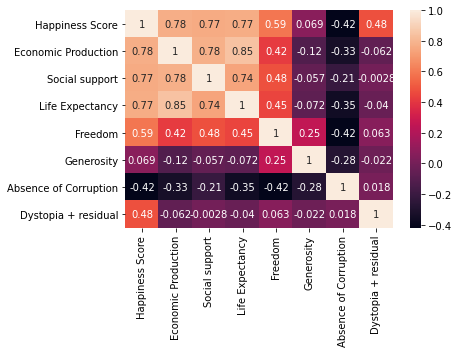

In [ ]:
# Correlation Matrix (Pearson's R between every variable)
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
data2 = data.drop(['Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy',\
                   'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption',\
                   'upperwhisker', 'lowerwhisker', 'Standard error of ladder score'], axis=1)
cm = data2.corr()
sn.heatmap(cm, annot=True)
plt.show()

Estimated Intercept in this model :-1.9389192773283606
Estimated Coefficients in this model :[ 0.21370187  2.74190073  0.03469612  1.92195795 -0.72754575]


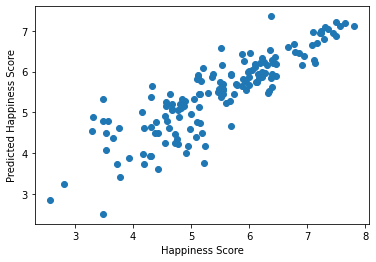

In [ ]:
# Our lowest MSE was at this without Dystopia variable:
X = data[['Economic Production', 'Social support', 'Life Expectancy', 'Freedom', 'Absence of Corruption']]
Y = data['Happiness Score']
modelf = LinearRegression().fit(X, Y)
print("Estimated Intercept in this model :" +str(modelf.intercept_))
print("Estimated Coefficients in this model :" +str(modelf.coef_))
modelf = LinearRegression()
modelf.fit(X, Y)
Y_hat = modelf.predict(X)[0:153]
predictions = Y_hat.tolist()
original = data['Happiness Score'].tolist()

plt.scatter(original, predictions)
plt.xlabel('Happiness Score')
plt.ylabel('Predicted Happiness Score');

Estimated Intercept in this model :-4.066443692486001
Estimated Coefficients in this model :[ 0.30993547  2.36193766  0.0360018   1.19860363  0.66134567 -0.64561715
  1.00000283]


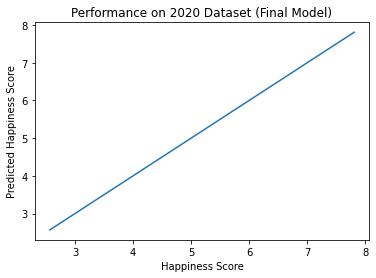

In [ ]:
Xs = ['Economic Production', 'Social support', 'Life Expectancy', 'Freedom', 'Generosity', 'Absence of Corruption', 'Dystopia + residual']
X = data[Xs]
Y = data['Happiness Score']

modelf = LinearRegression()
modelf.fit(X, Y)
Y_hat = modelf.predict(X)[0:153]
predictions = Y_hat.tolist()
original = data['Happiness Score'].tolist()
print("Estimated Intercept in this model :" +str(modelf.intercept_))
print("Estimated Coefficients in this model :" +str(modelf.coef_))

plt.plot(original, predictions);
plt.title('Performance on 2020 Dataset (Final Model)')
plt.xlabel('Happiness Score')
plt.ylabel('Predicted Happiness Score');

MSE of model on 2021 data: 0.2416528121416543


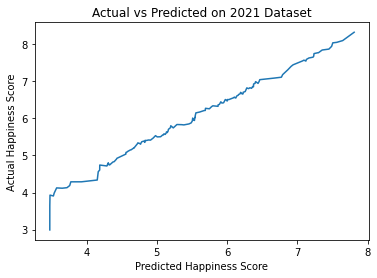

In [ ]:
data_2021 = pd.read_csv('https://raw.githubusercontent.com/NolanChai/COGS-109-Datasets/main/world-happiness-report-2021.csv')
data_2020 = pd.read_csv('https://raw.githubusercontent.com/NolanChai/COGS-109-Datasets/main/2020%20(1).csv')

data_2020 = data_2020.rename(columns ={"Ladder score": "Happiness Score", "Perceptions of corruption": "Absence of Corruption"})
data_2020 = data_2020.rename(columns ={"Healthy life expectancy": "Life Expectancy", "Freedom to make life choices": "Freedom", "Logged GDP per capita": "Economic Production"})
data_2021 = data_2021.rename(columns ={"Ladder score": "Happiness Score", "Perceptions of corruption": "Absence of Corruption"})
data_2021 = data_2021.rename(columns ={"Healthy life expectancy": "Life Expectancy", "Freedom to make life choices": "Freedom", "Logged GDP per capita": "Economic Production"})
Xs = ['Economic Production', 'Social support', 'Life Expectancy', 'Freedom', 'Generosity', 'Absence of Corruption', 'Dystopia + residual']
X = data_2020[Xs]
Y = data_2020['Happiness Score']
Test_X = data_2021[Xs]

model_2020 = LinearRegression()
model_2020.fit(X, Y)
Y_hat = model_2020.predict(Test_X)[0:149]
predictions = Y_hat.tolist()
original = data['Happiness Score'].tolist()[0:149]

squared_residuals = []
for i in range(0, len(predictions)):
  squared_res = (np.power(original[i]-predictions[i], 2))
  squared_residuals.append(squared_res)
MSE = sum(squared_residuals) / len(squared_residuals)
print("MSE of model on 2021 data: "+str(MSE))

plt.title('Actual vs Predicted on 2021 Dataset')
plt.xlabel('Predicted Happiness Score')
plt.ylabel('Actual Happiness Score')
plt.plot(original, predictions)

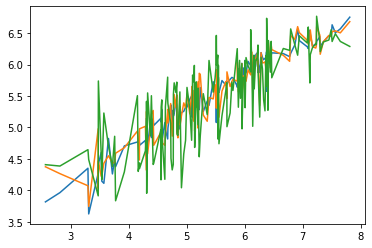

In [ ]:
all = [['Economic Production', 'Social support', 'Freedom', 'Dystopia + residual'],\
       ['Economic Production', 'Dystopia + residual'],\
       ['Economic Production']]

# Graph of Models: ^^ (see above)

for i in range(0, len(all)):
  temp = (all[i])
  X = data[temp]
  Y = data['Happiness Score']
  model = sm.OLS(Y, X).fit()
  original = data['Happiness Score'].tolist()
  Y_hat = model.predict(X)[0:153]
  predictions = Y_hat.tolist()
  plt.plot(original, predictions)

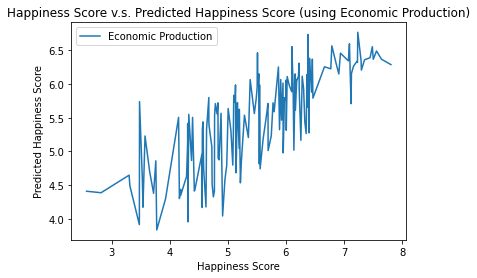

In [ ]:
X = data['Economic Production']
Y = data['Happiness Score']
model = sm.OLS(Y, X).fit()
original = data['Happiness Score'].tolist()
Y_hat = model.predict(X)[0:153]
predictions = Y_hat.tolist()
plt.plot(original, predictions)
plt.xlabel('Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Happiness Score v.s. Predicted Happiness Score (using Economic Production)')
plt.legend(['Economic Production']);

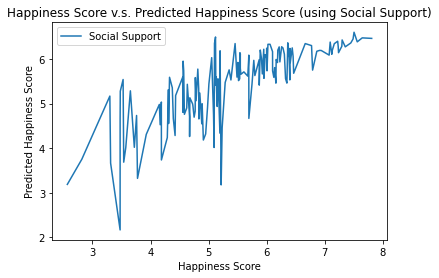

In [ ]:
X = data['Social support']
Y = data['Happiness Score']
model = sm.OLS(Y, X).fit()
original = data['Happiness Score'].tolist()
Y_hat = model.predict(X)[0:153]
predictions = Y_hat.tolist()
plt.plot(original, predictions)
plt.xlabel('Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Happiness Score v.s. Predicted Happiness Score (using Social Support)')
plt.legend(['Social Support']);

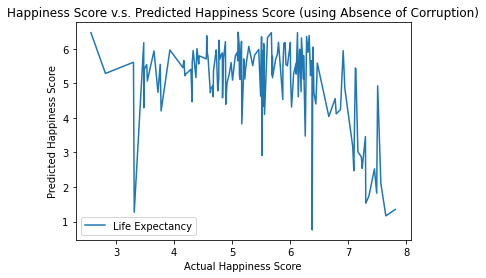

In [ ]:
X = data['Absence of Corruption']
Y = data['Happiness Score']
model = sm.OLS(Y, X).fit()
original = data['Happiness Score'].tolist()
Y_hat = model.predict(X)[0:153]
predictions = Y_hat.tolist()
plt.plot(original, predictions)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Happiness Score v.s. Predicted Happiness Score (using Absence of Corruption)')
plt.legend(['Life Expectancy']);

Estimated Intercept in this model :-3.8531457639553715
Estimated Coefficients in this model :[ 0.28445322  2.39535811  0.03501475  1.43727918 -0.80492777  0.99004023]


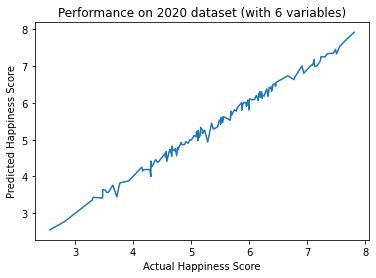

In [ ]:
# Model with 6 variables

Xs = ['Economic Production', 'Social support', 'Life Expectancy', 'Freedom', 'Absence of Corruption', 'Dystopia + residual']
X = data[Xs]
Y = data['Happiness Score']

modelf = LinearRegression()
modelf.fit(X, Y)
Y_hat = modelf.predict(X)[0:153]
predictions = Y_hat.tolist()
original = data['Happiness Score'].tolist()
print("Estimated Intercept in this model :" +str(modelf.intercept_))
print("Estimated Coefficients in this model :" +str(modelf.coef_))

plt.plot(original, predictions);
plt.title('Performance on 2020 dataset (with 6 variables)')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score');

Estimated Intercept in this model :-5.029102195428683
Estimated Coefficients in this model :[0.31298356 2.02425173 1.88707013 0.03932174 0.98539852]


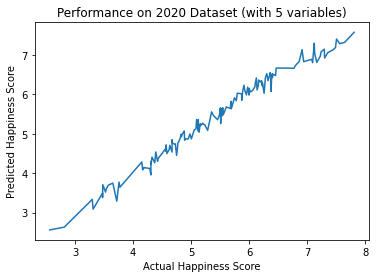

In [ ]:
# Model with 4 variables

Xs = ['Economic Production', 'Social support', 'Freedom', 'Life Expectancy','Dystopia + residual']
X = data[Xs]
Y = data['Happiness Score']

modelf = LinearRegression()
modelf.fit(X, Y)
Y_hat = modelf.predict(X)[0:153]
predictions = Y_hat.tolist()
original = data['Happiness Score'].tolist()
print("Estimated Intercept in this model :" +str(modelf.intercept_))
print("Estimated Coefficients in this model :" +str(modelf.coef_))

plt.plot(original, predictions);
plt.title('Performance on 2020 Dataset (with 5 variables)')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score');

Estimated Intercept in this model :-4.456713770138942
Estimated Coefficients in this model :[0.6429511  2.52937794 0.99976609]


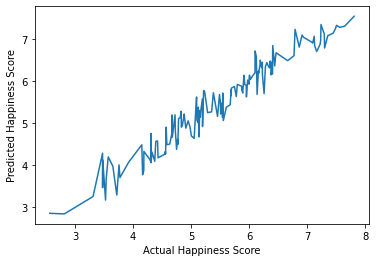

In [ ]:
# Model with 3 variables

Xs = ['Economic Production', 'Freedom', 'Dystopia + residual']
X = data[Xs]
Y = data['Happiness Score']

modelf = LinearRegression()
modelf.fit(X, Y)
Y_hat = modelf.predict(X)[0:153]
predictions = Y_hat.tolist()
original = data['Happiness Score'].tolist()
print("Estimated Intercept in this model :" +str(modelf.intercept_))
print("Estimated Coefficients in this model :" +str(modelf.coef_))

plt.plot(original, predictions);
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score');

Estimated Intercept in this model :-3.546477974513058
Estimated Coefficients in this model :[0.74821237 1.04676681]


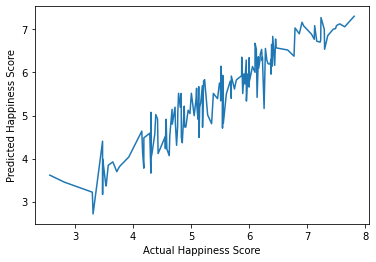

In [ ]:
# Model with 2 variables

Xs = ['Economic Production', 'Dystopia + residual']
X = data[Xs]
Y = data['Happiness Score']

modelf = LinearRegression()
modelf.fit(X, Y)
Y_hat = modelf.predict(X)[0:153]
predictions = Y_hat.tolist()
original = data['Happiness Score'].tolist()
print("Estimated Intercept in this model :" +str(modelf.intercept_))
print("Estimated Coefficients in this model :" +str(modelf.coef_))

plt.plot(original, predictions);
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score');

Estimated Intercept in this model :-1.1986460619042703
Estimated Coefficients in this model :[0.7177385]


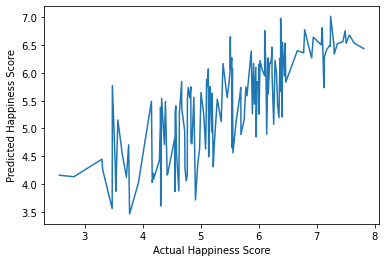

In [ ]:
# Model with 1 variables

Xs = ['Economic Production']
X = data[Xs]
Y = data['Happiness Score']

modelf = LinearRegression()
modelf.fit(X, Y)
Y_hat = modelf.predict(X)[0:153]
predictions = Y_hat.tolist()
original = data['Happiness Score'].tolist()
print("Estimated Intercept in this model :" +str(modelf.intercept_))
print("Estimated Coefficients in this model :" +str(modelf.coef_))

plt.plot(original, predictions);
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score');

Estimated Intercept in this model :-1.4759944110908547
Estimated Coefficients in this model :[0.42212422 3.74083453]


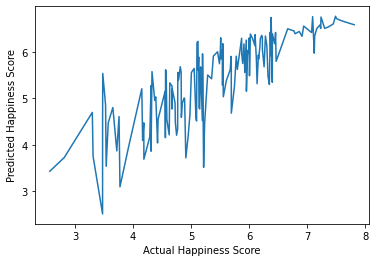

In [ ]:
Xs = ['Economic Production', 'Social support']
X = data[Xs]
Y = data['Happiness Score']

modelf = LinearRegression()
modelf.fit(X, Y)
Y_hat = modelf.predict(X)[0:153]
predictions = Y_hat.tolist()
original = data['Happiness Score'].tolist()
print("Estimated Intercept in this model :" +str(modelf.intercept_))
print("Estimated Coefficients in this model :" +str(modelf.coef_))

plt.plot(original, predictions);
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score');